In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
sns.set_theme(style='white', context='notebook', font_scale=1.33)

## Load StanFit summaries.
# df1 = read_csv(os.path.join('stan_results','study_01','2pl_samples_summary.csv'), index_col=0)
# df2 = read_csv(os.path.join('stan_results','study_02','2pl_samples_summary.csv'), index_col=0)
df2 = read_csv(os.path.join('stan_results','study_02','2pl_summary.tsv'), sep='\t', index_col='name')

## Section 1: Posterior Predictive Check

#### 1.1 Item-specific log-likelihood differences between predicted and observed responses

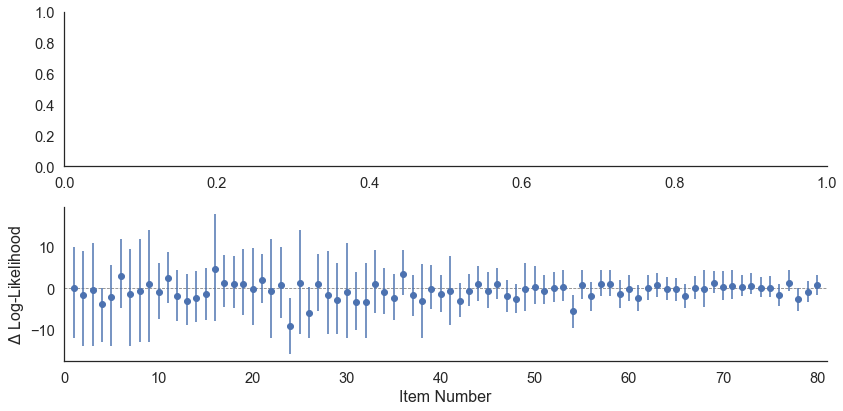

In [21]:
## Initialize canvas.
fig, axes = plt.subplots(2,1,figsize=(12,6))

## Plot second study.
mu, lb, ub = df2.T.filter(regex='dLL').T[['Mean','5%','95%']].values.T
axes[1].errorbar(np.arange(80)+1, mu, yerr=[(mu-lb),(ub-mu)], fmt='o')
axes[1].axhline(0, color='0.5', lw=0.8, linestyle='--', zorder=-1)
axes[1].set(xlim=(0,81), xlabel='Item Number', ylabel=r'$\Delta$ Log-Likelihood')

sns.despine()
plt.tight_layout()

## Section 2: Parameter Consistency

#### 2.1 Parameter correlations

In [ ]:
from scipy.stats import pearsonr

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(10,4))

## Extract item difficulties (alpha).
x = df1.T.filter(regex='alpha').T['mean'].values
y = df2.T.filter(regex='alpha').T['mean'].values
rval, pval = pearsonr(x, y)

## Plot item difficulties (alpha).
sns.scatterplot(x=x, y=y, ax=axes[0])
axes[0].plot([-10,10],[-10,10],color='0.5',lw=0.8,linestyle='--',zorder=-1)
axes[0].annotate('r = %0.3f\np = %0.3f' %(rval,pval), (0,0), (0.025,0.975),
                 xycoords='axes fraction', ha='left', va='top')
axes[0].set(xlim=(-5.5,3.5), xlabel='Study 1', ylim=(-5.5,3.5), ylabel='Study 2', 
            title=r'Item Difficulties ($\alpha$)')

## Extract item discriminations (gamma).
x = df1.T.filter(regex='gamma').T['mean'].values
y = df2.T.filter(regex='gamma').T['mean'].values
rval, pval = pearsonr(x, y)

## Plot item difficulties (alpha).
sns.scatterplot(x=x, y=y, ax=axes[1])
axes[1].plot([0,5],[0,5],color='0.5',lw=0.8,linestyle='--',zorder=-1)
axes[1].annotate('r = %0.3f\np = %0.3f' %(rval,pval), (0,0), (0.025,0.975),
                 xycoords='axes fraction', ha='left', va='top')
axes[1].set(xlim=(0.25,3.5), xlabel='Study 1', ylim=(0.25,3.5), ylabel='Study 2', 
            title=r'Item Discriminations ($\gamma$)')

sns.despine()
plt.tight_layout()

#### 2.2 Parameter Uncertainties

In [ ]:
## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4))

## Plot item difficulties (alpha).
sns.scatterplot(x=np.arange(80)+1, y=df1.T.filter(regex='alpha').T['sd'].values, ax=axes[0])
sns.scatterplot(x=np.arange(80)+1, y=df2.T.filter(regex='alpha').T['sd'].values, ax=axes[0])
axes[0].set(xlabel='Item Number', ylabel='Uncertainty (sd)', title=r'Item Difficulties ($\alpha$)')

## Plot item discriminations (gamma).
sns.scatterplot(x=np.arange(80)+1, y=df1.T.filter(regex='gamma').T['sd'].values, ax=axes[1])
sns.scatterplot(x=np.arange(80)+1, y=df2.T.filter(regex='gamma').T['sd'].values, ax=axes[1])
axes[1].set(xlabel='Item Number', ylabel='Uncertainty (sd)', title=r'Item Discriminations ($\gamma$)')

sns.despine()
plt.tight_layout()

## Section 3: External Validity

#### 3.1 Item Dimensionality

In [35]:
dimensionality = read_csv(os.path.join('data', 'dimensionality.csv'), index_col='Item')

In [41]:
df2.T.filter(regex='alpha').

name,alpha[1],alpha[2],alpha[3],alpha[4],alpha[5],alpha[6],alpha[7],alpha[8],alpha[9],alpha[10],...,alpha[72],alpha[73],alpha[74],alpha[75],alpha[76],alpha[77],alpha[78],alpha[79],alpha[80],sigma_alpha
Mean,-3.900,-3.400,-3.3000,-4.500,-4.100,-0.1400,-3.400,-1.5000,-3.000,0.4700,...,0.073,-0.036,0.21,0.290,1.700,0.0036,1.900,1.500,0.930,1.84
MCSE,0.013,0.012,0.0097,0.019,0.016,0.0054,0.011,0.0057,0.012,0.0052,...,0.017,0.017,0.02,0.019,0.018,0.0190,0.017,0.018,0.019,0.00
StdDev,0.760,0.700,0.6200,0.970,0.810,0.3700,0.680,0.3800,0.640,0.3300,...,1.000,1.100,1.10,1.200,1.200,1.2000,1.200,1.300,1.300,0.20
5%,-5.200,-4.700,-4.4000,-6.300,-5.600,-0.7500,-4.600,-2.1000,-4.200,-0.0440,...,-1.400,-1.500,-1.30,-1.300,-0.032,-1.7000,0.140,-0.390,-0.920,1.54
50%,-3.800,-3.400,-3.2000,-4.400,-4.000,-0.1400,-3.400,-1.4000,-3.000,0.4600,...,-0.068,-0.190,0.05,0.092,1.600,-0.1600,1.800,1.300,0.780,1.83
95%,-2.800,-2.400,-2.3000,-3.100,-2.900,0.4600,-2.400,-0.8800,-2.100,1.0000,...,2.000,2.000,2.30,2.400,3.900,2.3000,4.000,3.800,3.300,2.21
N_Eff,3658.000,3353.000,4055.0000,2701.000,2742.000,4599.0000,3790.000,4426.0000,2670.000,4013.0000,...,3855.000,3870.000,2938.00,3713.000,4305.000,4206.0000,4889.000,5181.000,4697.000,2178.81
N_Eff/s,17.000,15.000,19.0000,12.000,13.000,21.0000,17.000,20.0000,12.000,18.0000,...,18.000,18.000,13.00,17.000,20.000,19.0000,22.000,24.000,22.000,9.99
R_hat,1.000,1.000,1.0000,1.000,1.000,1.0000,1.000,1.0000,1.000,1.0000,...,1.000,1.000,1.00,1.000,1.000,1.0000,1.000,1.000,1.000,1.00


<AxesSubplot:>

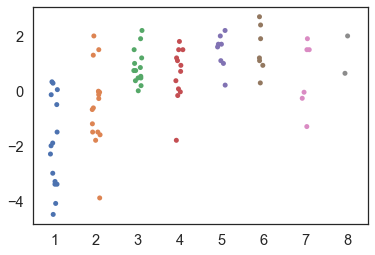

In [42]:
sns.stripplot(
    x=dimensionality['Dimensionality Score'].values,
    y=df2.T.filter(regex='^alpha').T['Mean'].values
)